# Brief Intro to Pandas

This week we'll learn a little bit about [pandas](http://pandas.pydata.org/).  In particular, we'll see some of the ways that it does things we've gotten used to implementing ourselves, and we'll learn about its `groupby` and indexing operations.

Pandas is one of the most popular libraries in Python, and there is no shortage of tutorials and examples out there.  This example is not meant to replace those, but instead to provide an introduction that touches upon examples we've used in the past.

In [1]:
import numpy as np
import pandas as pd

By convention, `pandas` is imported as `pd`.  We'll now use its built in CSV reader to read in data we've 

In [2]:
df = pd.read_csv("/srv/nbgrader/data/Building_Inventory.csv")

In [3]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [4]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [5]:
df.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [6]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000,8.849000e+03,8849.000000,8849.000000,8849.000000
mean,61819.588315,13.332128,92.222059,46.368742,1919.027348,1911.452594,1.149795e+04,1.641880,1.458583,0.163182
std,1096.101975,4.142016,23.660796,11.829302,320.213274,336.453172,3.819806e+04,1.541914,1.286188,0.394120
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.390000e+02,1.000000,1.000000,0.000000
50%,62002.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.634000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.462000e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2016.000000,2017.000000,1.200000e+06,31.000000,30.000000,4.000000


In [13]:
df.iloc[10]["County"]

'LaSalle'

In [14]:
df.loc[10, ["County", "Senate Dist"]]

County         LaSalle
Senate Dist         38
Name: 10, dtype: object

In [18]:
df2 = df.iloc[[10, 11, 599, 1000], [0, 1, 6]]
df2

,Agency Name,Location Name,Congress Dist
10,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
11,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
599,Department of Natural Resources,Des Plaines State F&WA - Will County,16
1000,Department of Natural Resources,World Shooting & Recreational Complex-Sparta,12


In [21]:
df2.loc[10]

Agency Name              Department of Natural Resources
Location Name    Matthiessen State Park - LaSalle County
Congress Dist                                         16
Name: 10, dtype: object

In [23]:
df2.index.name = "Original Row"

In [24]:
df2

,Agency Name,Location Name,Congress Dist
Original Row,,,
10,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
11,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
599,Department of Natural Resources,Des Plaines State F&WA - Will County,16
1000,Department of Natural Resources,World Shooting & Recreational Complex-Sparta,12


In [30]:
df2["Agency Name"].name = "Other"

In [31]:
df2

,Agency Name,Location Name,Congress Dist
Original Row,,,
10,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
11,Department of Natural Resources,Matthiessen State Park - LaSalle County,16
599,Department of Natural Resources,Des Plaines State F&WA - Will County,16
1000,Department of Natural Resources,World Shooting & Recreational Complex-Sparta,12


In [32]:
df2["Other"] = df2["Agency Name"]
del df2["Agency Name"]

In [33]:
df2

,Location Name,Congress Dist,Other
Original Row,,,
10,Matthiessen State Park - LaSalle County,16,Department of Natural Resources
11,Matthiessen State Park - LaSalle County,16,Department of Natural Resources
599,Des Plaines State F&WA - Will County,16,Department of Natural Resources
1000,World Shooting & Recreational Complex-Sparta,12,Department of Natural Resources


In [34]:
df2.iloc[0]

Location Name    Matthiessen State Park - LaSalle County
Congress Dist                                         16
Other                    Department of Natural Resources
Name: 10, dtype: object

In [35]:
df2.index

Int64Index([10, 11, 599, 1000], dtype='int64', name='Original Row')

In [36]:
df2.columns

Index(['Location Name', 'Congress Dist', 'Other'], dtype='object')

In [37]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [40]:
orig_agency = df["Agency Name"]

In [41]:
orig_agency.dtype

dtype('O')

In [43]:
cat_agency = orig_agency.astype("category")

In [44]:
cat_agency.dtype

category

In [45]:
df["Agency Name"] = cat_agency

In [47]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [49]:
cat_agency.value_counts()

Department of Natural Resources              3248
Department of Corrections                    1408
Department of Transportation                 1110
Department of Human Services                  619
University of Illinois                        518
Southern Illinois University                  419
Historic Preservation Agency                  284
Department of Agriculture                     228
Department of Military Affairs                226
Department of Juvenile Justice                140
Department of State Police                    109
Illinois State University                     102
Department of Veterans' Affairs                94
Northern Illinois University                   79
Department of Central Management Services      60
Western Illinois University                    42
Office of the Secretary of State               41
Eastern Illinois University                    35
Northeastern Illinois University               18
Chicago State University                       16


In [50]:
df["Agency Name"].value_counts()

Department of Natural Resources              3248
Department of Corrections                    1408
Department of Transportation                 1110
Department of Human Services                  619
University of Illinois                        518
Southern Illinois University                  419
Historic Preservation Agency                  284
Department of Agriculture                     228
Department of Military Affairs                226
Department of Juvenile Justice                140
Department of State Police                    109
Illinois State University                     102
Department of Veterans' Affairs                94
Northern Illinois University                   79
Department of Central Management Services      60
Western Illinois University                    42
Office of the Secretary of State               41
Eastern Illinois University                    35
Northeastern Illinois University               18
Chicago State University                       16


In [52]:
df["Zip code"].value_counts()

62702    265
62901    258
62037    235
61801    220
62958    199
61820    146
62471    130
62656    126
62259    126
62260    123
60434    106
61764    104
61761    102
60477    100
61373     99
62627     96
62995     92
62650     89
62675     88
62703     84
61341     83
61858     83
61615     83
62897     81
60466     79
62231     79
61021     76
62233     76
62832     75
61074     73
        ... 
61108      1
62060      1
62012      1
62280      1
62888      1
62896      1
62844      1
61720      1
62209      1
60534      1
61101      1
61420      1
61245      1
61072      1
62161      1
60018      1
60070      1
62029      1
61605      1
61267      1
61368      1
61376      1
62047      1
60060      1
60140      1
60164      1
61247      1
61103      1
61011      1
62882      1
Name: Zip code, dtype: int64

In [53]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Mautino Frank J.,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


In [54]:
import matplotlib.pyplot as plt

In [57]:
%matplotlib inline

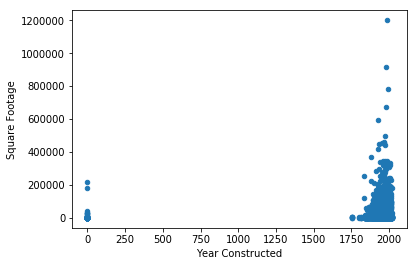

In [61]:
df.plot("Year Constructed", "Square Footage", kind='scatter')

In [65]:
df["Year Constructed"].replace(0, np.nan, inplace=True)

In [66]:
df["Year Acquired"].replace(0, np.nan, inplace=True)

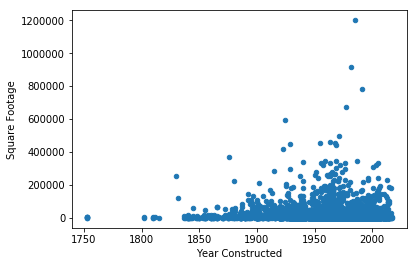

In [67]:
df.plot("Year Constructed", "Square Footage", kind="scatter")

In [79]:
df.groupby("Agency Name")["Square Footage"]

In [81]:
wdi = pd.read_csv("/srv/nbgrader/data/WDI/WDI_Data.csv", encoding="cp1252")

In [83]:
wdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [84]:
wdi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.436235e+01,NaN,8.628035e+01,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.198423e+01,NaN,7.391781e+01,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.383966e+01,NaN,9.515673e+01,NaN,NaN,NaN,NaN
5,Arab World,ARB,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.602252e+01,NaN,8.658057e+01,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Access to non-solid fuel, rural (% of rural po...",EG.NSF.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.456626e+01,NaN,7.494069e+01,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Access to non-solid fuel, urban (% of urban po...",EG.NSF.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.455237e+01,NaN,9.497705e+01,NaN,NaN,NaN,NaN
8,Arab World,ARB,Account at a financial institution (% age 15+)...,WP_time_01.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Account at a financial institution, female (% ...",WP_time_01.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
wdi2 = wdi.set_index(["Country Code", "Indicator Code"])

In [87]:
wdi2

Country Name  \
Country Code Indicator Code                          
ARB          PA.NUS.PPP.05              Arab World   
             PA.NUS.PRVT.PP.05          Arab World   
             EG.ELC.ACCS.ZS             Arab World   
             EG.ELC.ACCS.RU.ZS          Arab World   
             EG.ELC.ACCS.UR.ZS          Arab World   
             EG.NSF.ACCS.ZS             Arab World   
             EG.NSF.ACCS.RU.ZS          Arab World   
             EG.NSF.ACCS.UR.ZS          Arab World   
             WP_time_01.1               Arab World   
             WP_time_01.3               Arab World   
             WP_time_01.8               Arab World   
             WP_time_01.9               Arab World   
             WP_time_01.2               Arab World   
             per_si_allsi.adq_pop_tot   Arab World   
             per_allsp.adq_pop_tot      Arab World   
             per_sa_allsa.adq_pop_tot   Arab World   
             per_lm_alllm.adq_pop_tot   Arab World   
             SE.PRM.TENR.FE             Arab World   
             SE.PRM.TENR.MA             Arab World   
             SE.PRM.TENR                Arab World   
             NY.ADJ.NNTY.KD.ZG          Arab World   
             NY.ADJ.NNTY.KD             Arab World   
             NY.ADJ.NNTY.CD             Arab World   
             NY.ADJ.NNTY.PC.KD.ZG       Arab World   
             NY.ADJ.NNTY.PC.KD          Arab World   
             NY.ADJ.NNTY.PC.CD          Arab World   
             NY.ADJ.SVNX.GN.ZS          Arab World   
             NY.ADJ.SVNX.CD             Arab World   
             NY.ADJ.SVNG.GN.ZS          Arab World   
             NY.ADJ.SVNG.CD             Arab World   
...                                            ...   
ZWE          AG.LND.EL5M.UR.K2            Zimbabwe   
             SP.URB.TOTL                  Zimbabwe   
             SP.URB.TOTL.IN.ZS            Zimbabwe   
             SP.URB.GROW                  Zimbabwe   
             EN.POP.EL5M.UR.ZS            Zimbabwe   
             SI.POV.URGP                  Zimbabwe   
             SI.POV.URHC                  Zimbabwe   
             DT.DOD.DIMF.CD               Zimbabwe   
             SH.MLR.NETS.ZS               Zimbabwe   
             IC.FRM.OUTG.ZS               Zimbabwe   
             SN.ITK.VITA.ZS               Zimbabwe   
             SL.EMP.VULN.FE.ZS            Zimbabwe   
             SL.EMP.VULN.MA.ZS            Zimbabwe   
             SL.EMP.VULN.ZS               Zimbabwe   
             SL.EMP.WORK.FE.ZS            Zimbabwe   
             SL.EMP.WORK.MA.ZS            Zimbabwe   
             SL.EMP.WORK.ZS               Zimbabwe   
             SP.DYN.WFRT                  Zimbabwe   
             ER.GDP.FWTL.M3.KD            Zimbabwe   
             FP.WPI.TOTL                  Zimbabwe   
             SG.DMK.ALLD.FN.ZS            Zimbabwe   
             SG.VAW.REAS.ZS               Zimbabwe   
             SG.VAW.ARGU.ZS               Zimbabwe   
             SG.VAW.BURN.ZS               Zimbabwe   
             SG.VAW.GOES.ZS               Zimbabwe   
             SG.VAW.NEGL.ZS               Zimbabwe   
             SG.VAW.REFU.ZS               Zimbabwe   
             SP.M18.2024.FE.ZS            Zimbabwe   
             SH.DYN.AIDS.FE.ZS            Zimbabwe   
             SE.ADT.1524.LT.ZS            Zimbabwe   

                                                                          Indicator Name  \
Country Code Indicator Code                                                                
ARB          PA.NUS.PPP.05             2005 PPP conversion factor, GDP (LCU per inter...   
             PA.NUS.PRVT.PP.05         2005 PPP conversion factor, private consumptio...   
             EG.ELC.ACCS.ZS                      Access to electricity (% of population)   
             EG.ELC.ACCS.RU.ZS         Access to electricity, rural (% of rural popul...   
             EG.ELC.ACCS.UR.ZS         Access to electricity, urban (% of urban pop

In [88]:
wdi2.shape

(383328, 59)

In [94]:
wdi2.loc["ARB", "PA.NUS.PPP.05"]

Country Name                                             Arab World
Indicator Name    2005 PPP conversion factor, GDP (LCU per inter...
1960                                                            NaN
1961                                                            NaN
1962                                                            NaN
1963                                                            NaN
1964                                                            NaN
1965                                                            NaN
1966                                                            NaN
1967                                                            NaN
1968                                                            NaN
1969                                                            NaN
1970                                                            NaN
1971                                                            NaN
1972                                            

In [105]:
urb_growth = wdi2[wdi2["Country Name"] == "Sweden"].loc["SWE", "SP.URB.GROW"]

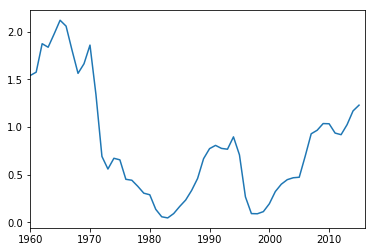

In [116]:
urb_growth.loc["1960":"2016"].plot()

In [113]:
wdi2.loc[:, "1960":"1961"]

1960           1961
Country Code Indicator Code                                        
ARB          PA.NUS.PPP.05                       NaN            NaN
             PA.NUS.PRVT.PP.05                   NaN            NaN
             EG.ELC.ACCS.ZS                      NaN            NaN
             EG.ELC.ACCS.RU.ZS                   NaN            NaN
             EG.ELC.ACCS.UR.ZS                   NaN            NaN
             EG.NSF.ACCS.ZS                      NaN            NaN
             EG.NSF.ACCS.RU.ZS                   NaN            NaN
             EG.NSF.ACCS.UR.ZS                   NaN            NaN
             WP_time_01.1                        NaN            NaN
             WP_time_01.3                        NaN            NaN
             WP_time_01.8                        NaN            NaN
             WP_time_01.9                        NaN            NaN
             WP_time_01.2                        NaN            NaN
             per_si_allsi.adq_pop_tot            NaN            NaN
             per_allsp.adq_pop_tot               NaN            NaN
             per_sa_allsa.adq_pop_tot            NaN            NaN
             per_lm_alllm.adq_pop_tot            NaN            NaN
             SE.PRM.TENR.FE                      NaN            NaN
             SE.PRM.TENR.MA                      NaN            NaN
             SE.PRM.TENR                         NaN            NaN
             NY.ADJ.NNTY.KD.ZG                   NaN            NaN
             NY.ADJ.NNTY.KD                      NaN            NaN
             NY.ADJ.NNTY.CD                      NaN            NaN
             NY.ADJ.NNTY.PC.KD.ZG                NaN            NaN
             NY.ADJ.NNTY.PC.KD                   NaN            NaN
             NY.ADJ.NNTY.PC.CD                   NaN            NaN
             NY.ADJ.SVNX.GN.ZS                   NaN            NaN
             NY.ADJ.SVNX.CD                      NaN            NaN
             NY.ADJ.SVNG.GN.ZS                   NaN            NaN
             NY.ADJ.SVNG.CD                      NaN            NaN
...                                              ...            ...
ZWE          AG.LND.EL5M.UR.K2                   NaN            NaN
             SP.URB.TOTL               473101.000000  497024.000000
             SP.URB.TOTL.IN.ZS             12.608000      12.821000
             SP.URB.GROW                    4.897746       4.932942
             EN.POP.EL5M.UR.ZS                   NaN            NaN
             SI.POV.URGP                         NaN            NaN
             SI.POV.URHC                         NaN            NaN
             DT.DOD.DIMF.CD                      NaN            NaN
             SH.MLR.NETS.ZS                      NaN            NaN
             IC.FRM.OUTG.ZS                      NaN            NaN
             SN.ITK.VITA.ZS                      NaN            NaN
             SL.EMP.VULN.FE.ZS                   NaN            NaN
             SL.EMP.VULN.MA.ZS                   NaN            NaN
             SL.EMP.VULN.ZS                      NaN            NaN
             SL.EMP.WORK.FE.ZS                   NaN            NaN
             SL.EMP.WORK.MA.ZS                   NaN            NaN
             SL.EMP.WORK.ZS                      NaN            NaN
             SP.DYN.WFRT                         NaN            NaN
             ER.GDP.FWTL.M3.KD                   NaN            NaN
             FP.WPI.TOTL                         NaN            NaN
             SG.DMK.ALLD.FN.ZS                   NaN            NaN
             SG.VAW.REAS.ZS                      NaN            NaN
             SG.VAW.ARGU.ZS                      NaN            NaN
             SG.VAW.BURN.ZS                      NaN            NaN
             SG.VAW.GOES.ZS                      NaN            NaN
             SG.VAW.NEGL.ZS                      NaN            NaN
             SG.VAW.REFU.ZS         